<a href="https://colab.research.google.com/github/Luca-Skyline/Check4Mate/blob/main/Chess_Piece_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle
import gc

print(tf.__version__)

2.13.0


In [2]:
!git clone https://github.com/Luca-Skyline/check4mate/
%cd /content/check4mate/Chess_Classification_Dataset

Cloning into 'check4mate'...
remote: Enumerating objects: 19931, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 19931 (delta 18), reused 10 (delta 2), pack-reused 19892
Receiving objects: 100% (19931/19931), 158.32 MiB | 29.46 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Updating files: 100% (23311/23311), done.
/content/check4mate/Chess_Classification_Dataset


In [3]:
class_names = []

train_labels = []

for class_index, folder in enumerate(os.listdir('train/')):
  train_images = []
  current_folder_path = os.path.join('train/', folder)
  if os.path.isdir(current_folder_path):
    class_names.append(folder)
    for image in os.listdir(current_folder_path):
      current_image_path = os.path.join(current_folder_path, image)
      if os.path.isfile(current_image_path):
        image = cv2.imread(current_image_path, cv2.IMREAD_GRAYSCALE)
        pixel_array = np.array(image.tolist())
        train_images.append(pixel_array)
        train_labels.append(class_index)
  train_images = np.array(train_images)
  with open(f'train_images_{class_index}.pk1', 'wb') as file:
    pickle.dump(train_images, file)
  del train_images

train_labels = np.array(train_labels)
with open('train_labels.pk1', 'wb') as file:
  pickle.dump(train_labels, file)

del train_labels

In [4]:
class_names

['wr',
 'wb',
 'bq',
 'bp',
 'bk',
 'bb',
 'empty',
 'wp',
 'wn',
 'wq',
 'bn',
 'wk',
 'br']

In [5]:
test_images = []
test_labels = []

for class_index, folder in enumerate(os.listdir('valid/')):
  current_folder_path = os.path.join('valid/', folder)
  if os.path.isdir(current_folder_path):
    for image in os.listdir(current_folder_path):
      current_image_path = os.path.join(current_folder_path, image)
      if os.path.isfile(current_image_path):
        image = cv2.imread(current_image_path, cv2.IMREAD_GRAYSCALE)
        pixel_array = np.array(image.tolist())
        test_images.append(pixel_array)
        test_labels.append(class_index)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

with open('test_images.pk1', 'wb') as file:
   pickle.dump(test_images, file)

with open('test_labels.pk1', 'wb') as file:
   pickle.dump(test_labels, file)

del test_images
del test_labels

(224, 224)


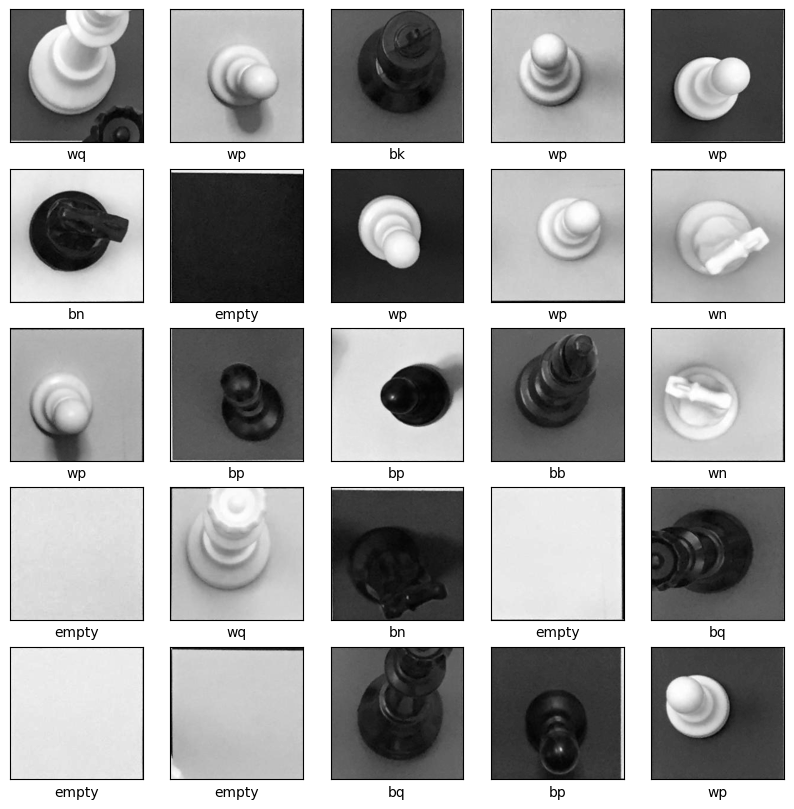

In [6]:
import random

with open('test_images.pk1', 'rb') as file:
  test_images = pickle.load(file)

with open('test_labels.pk1', 'rb') as file:
  test_labels = pickle.load(file)

print(test_images[0].shape)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = random.randint(0, test_images.shape[0])
    plt.imshow(test_images[index], cmap='gray')
    plt.xlabel(class_names[test_labels[index]])
plt.show()

In [7]:
del test_images, test_labels
gc.collect()

49158

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 173056)            0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train_images = []

for i in range(13):
  with open(f'train_images_{i}.pk1', 'rb') as file:
    train_images.append(pickle.load(file))

with open('train_labels.pk1', 'rb') as file:
  train_labels = pickle.load(file)

with open('test_images.pk1', 'rb') as file:
  test_images = pickle.load(file)

with open('test_labels.pk1', 'rb') as file:
  test_labels = pickle.load(file)

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))